In [1]:
from utz import *

In [2]:
from nj_crashes.sri.sri import get_sris
sris = get_sris()
len(sris)

34479

In [3]:
%%time
from njdot.data import START_YEAR, END_YEAR
c = concat([
    read_parquet(f'data/{year}/NewJersey{year}Accidents.pqt')
    for year in range(START_YEAR, END_YEAR)
])
c

CPU times: user 6.96 s, sys: 1.27 s, total: 8.23 s
Wall time: 6.05 s


,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,SRI (Standard Route Identifier),Mile Post,Road System,Road Character,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date,Road Horizontal Alignment,Road Grade,First Harmful Event
0,01,01,#2001-17846,ATLANTIC,ABSECON CITY,01,ABSECON CITY,MUNICIPAL COMP?,0,0,0,0,P,B,False,False,03,2,CALDERON AVENUE,,,,,NaN,07,02,02,01,06,01,05,01,100,FE,N,RT 30,,,,25,,NaN,NaN,N,NEVER SAW V-1 MINOR DAMAGE - NO INJURIES REPOR...,830,2001-12-21 18:34:00,NaN,NaN,NaN
1,01,01,01-00029,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,B,False,False,06,2,RITZ DRIVE,,,,,NaN,07,01,02,03,06,01,05,01,,,,,,,,25,,NaN,NaN,N,,836,2001-01-01 09:30:00,NaN,NaN,NaN
2,01,01,01-004615,ATLANTIC,ABSECON CITY,1,ABSECON,,0,4,0,0,I,I,False,False,03,2,MORTON AVENUE,,,,,NaN,07,01,02,01,01,01,05,01,,AT,,NEW YORK AVENUE,,,,25,,NaN,NaN,N,,836,2001-04-10 14:44:00,NaN,NaN,NaN
3,01,01,01-004880,ATLANTIC,ABSECON CITY,1,ABSECON,,0,1,0,0,I,B,False,False,01,2,RT 30,,30,,00000030__,51.10,02,01,02,01,01,01,05,01,,,,,,,,45,,NaN,NaN,N,WITNESS-PETRIA GIBSON AND ANGELO HERSH,886,2001-04-15 13:56:00,NaN,NaN,NaN
4,01,01,01-004912,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,I,False,False,01,2,CR 651,,651,,,NaN,05,02,02,02,01,02,05,01,,AT,,CR 630,,,,35,,NaN,NaN,N,*BETH VEHICLES-RELIANCE INSURANCE CO.(215)864-...,836,2001-04-16 10:29:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226953,21,23,B150-2021-00117A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,I,False,False,11,1,WARREN COUNTY 620,N,620,,21000620__,0.00,05,,02,01,06,01,05,01,,AT,,ROUTE 519 / S BRIDGEVILLE RD,,,,50,50,40.80707,75.07559,N,Damage to 10ft of Country road guardrail.,7837,2021-05-26 21:08:00,02,04,46
226954,21,23,B150-2021-00118A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,I,False,False,01,2,MANUNKA CHUNK RD / UPPER SEREPTA RD **,W,,,21231034__,1.73,07,,02,01,01,01,05,01,,AT,,MASSENATTS RD,,,,40,50,40.84466,75.05549,N,,8610,2021-05-25 07:26:00,01,04,26
226955,21,23,B150-2021-00128A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,12,1,ROUTE 519,S,519,,00000519__,44.00,05,,02,02,05,04,05,01,,,,,,,,50,,40.80564,75.07627,N,,8514,2021-06-03 20:17:00,03,04,24
226956,21,23,B150-2021-00130A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,12,1,US 46,E,46,,00000046__,7.50,02,,02,01,07,01,05,01,,,,,,,,50,,40.84149,75.04968,N,,8365,2021-06-06 00:00:00,01,04,24


In [4]:
c['County Name'].value_counts()

BERGEN        656350
ESSEX         610767
MIDDLESEX     606975
UNION         425445
HUDSON        424523
MONMOUTH      416092
PASSAIC       390426
OCEAN         340102
MORRIS        325609
CAMDEN        324947
MERCER        271333
BURLINGTON    264893
SOMERSET      237074
ATLANTIC      192238
GLOUCESTER    155854
CUMBERLAND     98515
HUNTERDON      83811
SUSSEX         78639
WARREN         71432
CAPE MAY       65356
SALEM          36922
Name: County Name, dtype: int64

In [5]:
%%time
nan_counts = c.isna().sum(axis=0)
nan_counts[nan_counts > 0]

CPU times: user 15.8 s, sys: 578 ms, total: 16.4 s
Wall time: 16.8 s


Mile Post                    2367547
Latitude                     4821948
Longitude                    4821948
Road Horizontal Alignment    4809915
Road Grade                   4809915
First Harmful Event          4809915
dtype: int64

In [6]:
missing_mp = c['Mile Post'].isna().rename('missing_mp')
no_mp = c[missing_mp]
yes_mp = c[~missing_mp]
no_mp

,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,SRI (Standard Route Identifier),Mile Post,Road System,Road Character,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date,Road Horizontal Alignment,Road Grade,First Harmful Event
0,01,01,#2001-17846,ATLANTIC,ABSECON CITY,01,ABSECON CITY,MUNICIPAL COMP?,0,0,0,0,P,B,False,False,03,2,CALDERON AVENUE,,,,,NaN,07,02,02,01,06,01,05,01,100,FE,N,RT 30,,,,25,,NaN,NaN,N,NEVER SAW V-1 MINOR DAMAGE - NO INJURIES REPOR...,830,2001-12-21 18:34:00,NaN,NaN,NaN
1,01,01,01-00029,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,B,False,False,06,2,RITZ DRIVE,,,,,NaN,07,01,02,03,06,01,05,01,,,,,,,,25,,NaN,NaN,N,,836,2001-01-01 09:30:00,NaN,NaN,NaN
2,01,01,01-004615,ATLANTIC,ABSECON CITY,1,ABSECON,,0,4,0,0,I,I,False,False,03,2,MORTON AVENUE,,,,,NaN,07,01,02,01,01,01,05,01,,AT,,NEW YORK AVENUE,,,,25,,NaN,NaN,N,,836,2001-04-10 14:44:00,NaN,NaN,NaN
4,01,01,01-004912,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,I,False,False,01,2,CR 651,,651,,,NaN,05,02,02,02,01,02,05,01,,AT,,CR 630,,,,35,,NaN,NaN,N,*BETH VEHICLES-RELIANCE INSURANCE CO.(215)864-...,836,2001-04-16 10:29:00,NaN,NaN,NaN
7,01,01,01-007162,ATLANTIC,ABSECON CITY,1,ABSECON,,0,1,0,1,I,B,False,False,13,1,CONNECTICUT AVENUE,,,,,NaN,07,01,02,01,01,01,05,01,75,FE,W,IRELAN AVENUE,,,,25,,NaN,NaN,N,NONE,836,2001-06-05 14:41:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226934,21,23,B150-2021-00038A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,06,2,472 US HIGHWAY 46 HW,W,,,,NaN,09,,03,02,05,03,05,01,,,,,,,,50,,40.84022,75.03218,N,,8518,2021-02-06 09:59:00,01,04,28
226940,21,23,B150-2021-00073A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,06,2,COUNTY RD,W,,,,NaN,09,,02,01,01,01,05,01,,,,,,,,5,,40.81220,75.04940,N,,8543,2021-03-29 12:42:00,01,04,26
226941,21,23,B150-2021-00074A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,03,2,RIDGE RD,W,,,,NaN,07,,02,01,01,01,05,01,,,,,,,,25,,40.74680,75.13740,N,,8514,2021-03-29 18:23:00,03,05,26
226946,21,23,B150-2021-00087A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,08,2,QUICK CHECK NA,W,,,,NaN,09,,02,01,01,01,02,01,,,,,,,,,,40.83747,75.02612,N,BOAT TOWED BY V2 SUSTAINED MODERATE DAMAGE TO ...,8518,2021-04-26 05:42:00,01,04,26


In [7]:
empty_mp = c['Mile Post'] == ''
empty_mp.sum()

0

In [8]:
year_crashes = c.Date.dt.year.value_counts().sort_index().rename('crashes')
no_mp_by_year = no_mp.Date.dt.year.value_counts().sort_index().rename('no_mp')
no_mp_pct = (no_mp_by_year / year_crashes).rename('no_mp_pct')
year_stats = sxs(
    no_mp_by_year,
    year_crashes,
    no_mp_pct,
)
year_stats

,no_mp,crashes,no_mp_pct
2001,176244,312696,0.563627
2002,164193,319979,0.513137
2003,134001,324053,0.413516
2004,130961,323419,0.404927
2005,129545,315434,0.410688
2006,121519,295546,0.411168
2007,127101,306816,0.414258
2008,130681,303013,0.431272
2009,134537,301233,0.446621
2010,138883,299575,0.463600


In [9]:
y = c.Date.dt.year.rename('Year')
cyms = (
    c
    .groupby(['County Name', y, missing_mp])
    .size()
    .rename('# Crashes')
    .reset_index(level=2)
)
cyms

missing_mp  # Crashes
County Name Year                       
ATLANTIC    2001       False       4797
            2001        True       4942
            2002       False       5338
            2002        True       4403
            2003       False       7355
...                      ...        ...
WARREN      2019        True        668
            2020       False       2419
            2020        True        259
            2021       False       2467
            2021        True        260

[882 rows x 2 columns]

In [10]:
cym_by_missing = (
    cyms
    .pivot(columns='missing_mp', values='# Crashes')
    .rename(columns={
        False: 'yes_mp',
        True: 'no_mp',
    })
)
cym_by_missing

missing_mp        yes_mp  no_mp
County Name Year               
ATLANTIC    2001    4797   4942
            2002    5338   4403
            2003    7355   2949
            2004    7627   3223
            2005    7320   3188
...                  ...    ...
WARREN      2017    2188    953
            2018    2586    934
            2019    2705    668
            2020    2419    259
            2021    2467    260

[441 rows x 2 columns]

In [11]:
cy_num_crashes = cym_by_missing.sum(axis=1).rename('# Crashes')
cy_num_crashes

County Name  Year
ATLANTIC     2001     9739
             2002     9741
             2003    10304
             2004    10850
             2005    10508
                     ...  
WARREN       2017     3141
             2018     3520
             2019     3373
             2020     2678
             2021     2727
Name: # Crashes, Length: 441, dtype: int64

In [12]:
cy_missing_mp_pct = (
    cym_by_missing
    .apply(lambda r: r.no_mp / r.sum(), axis=1)
    .rename('% Missing MP')
)

cy_stats = sxs(
    cy_missing_mp_pct,
    cy_num_crashes,
).reset_index()
cy_stats

,County Name,Year,% Missing MP,# Crashes
0,ATLANTIC,2001,0.507444,9739
1,ATLANTIC,2002,0.452007,9741
2,ATLANTIC,2003,0.286200,10304
3,ATLANTIC,2004,0.297051,10850
4,ATLANTIC,2005,0.303388,10508
...,...,...,...,...
436,WARREN,2017,0.303407,3141
437,WARREN,2018,0.265341,3520
438,WARREN,2019,0.198043,3373
439,WARREN,2020,0.096714,2678


In [13]:
import plotly.express as px
from IPython.display import Image
interactive = False

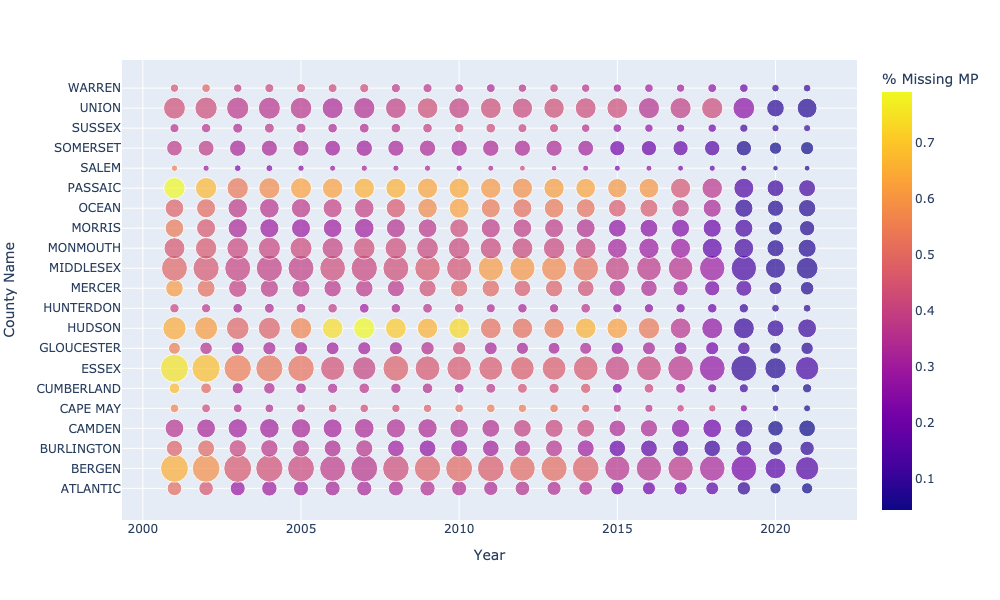

In [14]:
fig = px.scatter(
    cy_stats,
    x='Year',
    y='County Name',
    size='# Crashes',
    color='% Missing MP',
)

fig if interactive else Image(fig.to_image(width=1000, height=600))